In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving covid19.csv to covid19.csv


In [ ]:
import pandas as pd
import numpy as np

covid_19 = pd.read_csv('covid19.csv')



In [ ]:
print(covid_19.shape)

(429435, 67)


In [ ]:
print(covid_19.info)

<bound method DataFrame.info of        iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1           AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2           AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3           AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4           AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   
...         ...       ...          ...         ...          ...        ...   
429430      ZWE    Africa     Zimbabwe  2024-07-31     266386.0        0.0   
429431      ZWE    Africa     Zimbabwe  2024-08-01     266386.0        0.0   
429432      ZWE    Africa     Zimbabwe  2024-08-02     266386.0        0.0   
429433      ZWE    Africa     Zimbabwe  2024-08-03     266386.0        0.0   
429434      ZWE    Africa     Zimbabwe  2024-08-04     266386.0        0.0   

        new_cases_smoothed  tot

In [ ]:
print(covid_19.columns)

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [ ]:
casi_per_continente = covid_19.groupby('continent')['total_cases'].sum()

print("Numero totale di casi:")
print(casi_per_continente)


Numero totale di casi:
continent
Africa           1.461689e+10
Asia             2.521673e+11
Europe           2.367567e+11
North America    1.270737e+11
Oceania          1.159805e+10
South America    7.348457e+10
Name: total_cases, dtype: float64


In [ ]:

totale_casi_mondiali = covid_19['total_cases'].sum()

percentuale_per_continente = (casi_per_continente / totale_casi_mondiali) * 100

print("Percentuale di casi per continente rispetto al totale mondiale:")
print(percentuale_per_continente)


Percentuale di casi per continente rispetto al totale mondiale:
continent
Africa           0.481919
Asia             8.313966
Europe           7.805877
North America    4.189624
Oceania          0.382388
South America    2.422789
Name: total_cases, dtype: float64


<ipython-input-45-e31044485c71>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_19_italia['date'] = pd.to_datetime(covid_19_italia['date'])


Text(0, 0.5, 'Casi Totali')

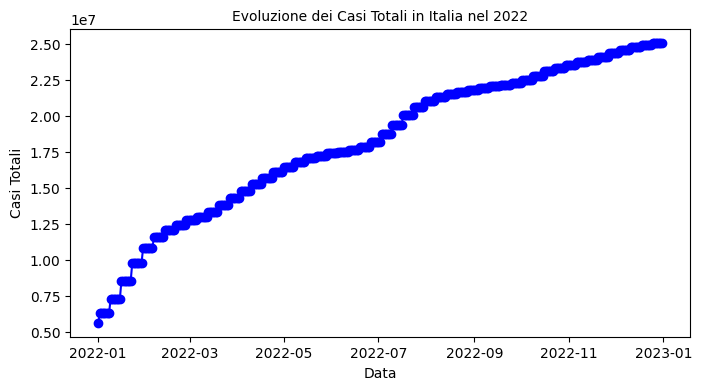

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

covid_19_italia = covid_19[covid_19['location'] == 'Italy']

covid_19_italia['date'] = pd.to_datetime(covid_19_italia['date'])

covid_19_italia_2022 = covid_19_italia[covid_19_italia['date'].dt.year == 2022]

plt.figure(figsize=(8, 4))
plt.plot(covid_19_italia_2022['date'], covid_19_italia_2022['total_cases'], marker='o', linestyle='-', color='b')

plt.title('Evoluzione dei Casi Totali in Italia nel 2022', fontsize=10)
plt.xlabel('Data', fontsize=10)
plt.ylabel('Casi Totali', fontsize=10)



<ipython-input-48-e3914ae91b29>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_19_italia['date'] = pd.to_datetime(covid_19_italia['date'])


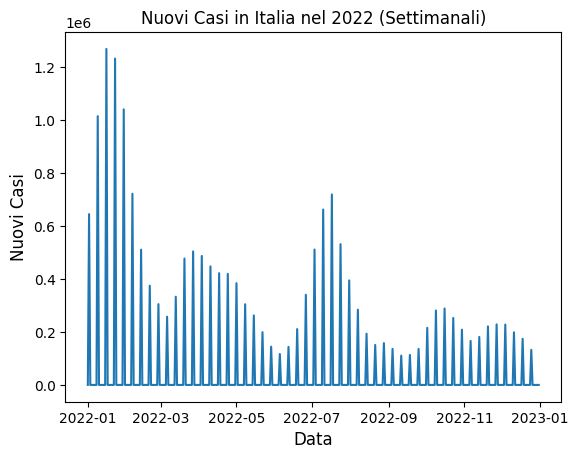

In [ ]:

covid_19_italia = covid_19[covid_19['location'] == 'Italy']

covid_19_italia['date'] = pd.to_datetime(covid_19_italia['date'])

covid_19_italia_2022 = covid_19_italia[covid_19_italia['date'].dt.year == 2022]

covid_19_italia_2022_validi = covid_19_italia_2022.dropna(subset=['new_cases'])

plt.plot(covid_19_italia_2022_validi['date'], covid_19_italia_2022_validi['new_cases'])

plt.title('Nuovi Casi in Italia nel 2022 (Settimanali)', fontsize=12)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Nuovi Casi', fontsize=12)

plt.show()


<ipython-input-49-44d4d11dbdf8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_19_filtro['date'] = pd.to_datetime(covid_19_filtro['date'])


<Figure size 1000x600 with 0 Axes>

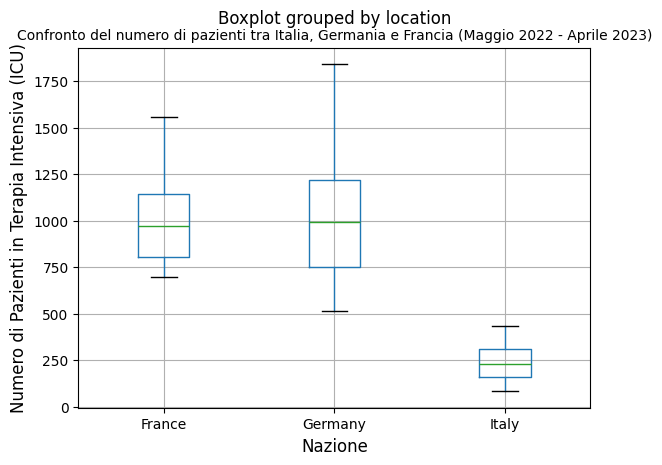

In [ ]:

nazioni = ['Italy', 'Germany', 'France']
covid_19_filtro = covid_19[covid_19['location'].isin(nazioni)]

covid_19_filtro['date'] = pd.to_datetime(covid_19_filtro['date'])

data_iniziale = '2022-05-01'
data_finale = '2023-04-30'
covid_19_filtro_periodo = covid_19_filtro[(covid_19_filtro['date'] >= data_iniziale) & (covid_19_filtro['date'] <= data_finale)]

plt.figure(figsize=(10, 6))
covid_19_filtro_periodo.boxplot(by='location', column='icu_patients')

plt.title('Confronto del numero di pazienti tra Italia, Germania e Francia (Maggio 2022 - Aprile 2023)', fontsize=10)
plt.xlabel('Nazione', fontsize=12)
plt.ylabel('Numero di Pazienti in Terapia Intensiva (ICU)', fontsize=12)
plt.show()

In [ ]:
# Il boxplot evidenzia che la distribuzione dei pazienti in terapia intensiva è diversa tra Italia,Germania e Italia. la Germania mostrando maggiore variabilità


In [ ]:


covid_19["date"] = pd.to_datetime(covid_19["date"])

nazionii = ["Italy", "Germany", "France", "Spain"]
anno_2023 = covid_19[
    (covid_19["date"] >= "2023-01-01") &
    (covid_19["date"] <= "2023-12-31") &
    (covid_19["location"].isin(nazionii))
]


print("Valori nulli per 'hosp_patients':")
print(anno_2023["hosp_patients"].isna().sum())

somme_ospedalizzati = anno_2023.groupby("location")["hosp_patients"].sum()
print(somme_ospedalizzati)

Valori nulli per 'hosp_patients':
843
location
France     1382574.0
Germany          0.0
Italy      1175272.0
Spain       354602.0
Name: hosp_patients, dtype: float64


In [ ]:
# i dati nulli possono essere sostituiti con un altro valore(es 0) oppure se non necessari, possono essere rimossi.